In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

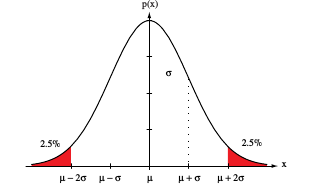

Fig.7: A univariate normal distribution has roughly 95% of its area in √ the range |x − µ| ≤ 2σ, as shown. The peak of the distribution has value p(µ) = 1/ 2πσ.

# Neyman-Pearson Criterion and Classifier Implementation

## 2.3.2 Neyman-Pearson Criterion

In some problems, we may wish to minimize the overall risk subject to a constraint. For instance, we might seek to minimize the total risk while ensuring:

$$
\int_{R(\alpha_i | x)} R(\alpha_i | x) \, dx < \text{constant}
$$

for some particular \( i \). This constraint may arise if a fixed resource accompanies a particular action \( \alpha_i \), or if misclassification from a certain state of nature \( \omega_i \) must not exceed a specified frequency. For example, suppose government regulations stipulate that no more than 1% of salmon should be misclassified as sea bass. The decision strategy would then aim to minimize the risk of classifying a sea bass as salmon under this condition.

Neyman-Pearson criteria often require numerical adjustment of decision boundaries. However, analytical solutions may be available for Gaussian or other specific distributions.

## Classifiers, Discriminant Functions, and Decision Surfaces

### The Multi-Category Case

Pattern classifiers can be represented by a set of discriminant functions \( g_i(x) \) for $ i = 1, \ldots, c \). The classifier assigns a feature vector \( x \) to class \( \omega_i \) if:

$$
g_i(x) > g_j(x) \quad \text{for all } j \neq i.
$$

This concept is visualized in the structure of a statistical pattern classifier network.

### Example Representation

A classifier receives input $ x = [x_1, x_2, \ldots, x_d] $, computes discriminant functions, and assigns the class corresponding to the maximum discriminant.

### Bayes Classifier Representation

A Bayes classifier can be represented with:

$$
g_i(x) = -R(\alpha_i | x)
$$

where the maximum discriminant function corresponds to the minimum conditional risk. For minimum-error-rate classification:

$$
g_i(x) = P(\omega_i | x)
$$

so the decision rule selects the maximum posterior probability. The choice of discriminant functions can be modified without affecting classification by:

$$
g_i(x) = f(g_i(x))
$$

where $ f(\cdot) $ is a monotonically increasing function. This leads to the following equivalent forms:

$$
g_i(x) = \frac{p(x|\omega_i)P(\omega_i)}{\sum_{j=1}^{c} p(x|\omega_j)P(\omega_j)}
$$

or

$$
g_i(x) = p(x|\omega_i)P(\omega_i)
$$

or

$$
g_i(x) = \ln p(x|\omega_i) + \ln P(\omega_i).
$$

These forms simplify analysis and computation while maintaining equivalent classification results.

### Decision Regions and Boundaries

The decision rules divide the feature space into regions $ R_1, R_2, \ldots, R_c $. A feature vector $ x $ belongs to region $ R_i $ if:

$$
g_i(x) > g_j(x) \quad \text{for all } j \neq i.
$$

Decision boundaries are the surfaces where discriminant functions tie.

### Visualization of Decision Boundaries

For Gaussian distributions, decision boundaries may be hyperbolic, leading to non-simply connected decision regions.

### 2.4.2 The Two-Category Case

While the two-category case is just a special instance of the multicategory case, it has traditionally received separate treatment. Indeed, a classifier that places a pattern in one of only two categories has a special name — a **dichotomizer**. Instead of using two dichotomizing discriminant functions $ g_1 $ and $ g_2 $ and assigning $ x $ to $ \omega_1 $ if $ g_1 > g_2 $, it is more common to define a single discriminant function:

$$
g(x) \equiv g_1(x) - g_2(x),
$$

and to use the following decision rule: Decide $ \omega_1 $ if $ g(x) > 0 $; otherwise decide $ \omega_2 $. Thus, a dichotomizer can be viewed as a machine that computes a single discriminant function $ g(x) $, and classifies $ x $ according to the algebraic sign of the result. 

Of the various forms in which the minimum-error-rate discriminant function can be written, the following two (derived from Eqs. 25 & 27) are particularly convenient:

$$
g(x) = P(\omega_1 | x) - P(\omega_2 | x)
$$

and

$$
g(x) = \ln \frac{p(x|\omega_1) P(\omega_1)}{p(x|\omega_2) P(\omega_2)}.
$$

## The Normal Density

The structure of a Bayes classifier is determined by the conditional densities $ p(x|\omega_i) $ as well as by the prior probabilities. Of the various density functions that have been investigated, none has received more attention than the multivariate normal or Gaussian density. 

To a large extent, this attention is due to its analytical tractability. However, the multivariate normal density is also an appropriate model for an important situation, viz., the case where the feature vectors $ x $ for a given class $ \omega_i $ are continuous valued, randomly corrupted versions of a single typical or prototype vector $ \mu_i $. 

###  Univariate Density

We begin with the continuous univariate normal or Gaussian density:

$$
p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right),
$$

for which the expected value of $ x $ (an average, here taken over the feature space) is:

$$
\mu \equiv E[x] = \int_{-\infty}^{\infty} x p(x) \, dx.
$$

The expected squared deviation or variance is:

$$
\sigma^2 \equiv E[(x - \mu)^2] = \int_{-\infty}^{\infty} (x - \mu)^2 p(x) \, dx.
$$

The univariate normal density is completely specified by two parameters: its mean $ \mu $ and variance $ \sigma^2 $. For simplicity, we often abbreviate the representation by writing $ p(x) \sim N(\mu, \sigma^2) $ to say that $ x $ is distributed normally with mean $ \mu $ and variance $ \sigma^2 $.

Samples from normal distributions tend to cluster about the mean, with a spread related to the standard deviation \( \sigma \).

The relationship between the normal distribution and entropy is noteworthy. The entropy of a distribution is given by:

$$
H(p(x)) = -\int p(x) \ln p(x) \, dx,
$$

and is measured in nats. If a logarithm base 2 is used instead, the unit is the bit. The entropy is a non-negative quantity that describes the fundamental uncertainty in the values of points selected randomly from a distribution. 

It can be shown that the normal distribution has the maximum entropy of all distributions having a given mean and variance. Moreover, as stated by the Central Limit Theorem, the aggregate effect of a large number of small, independent random disturbances will lead to a Gaussian distribution. 

Because many patterns — from fish to handwritten characters to some speech sounds — can be viewed as some ideal or prototype pattern corrupted by a large number of random processes, the Gaussian is often a good model for the actual probability distribution.


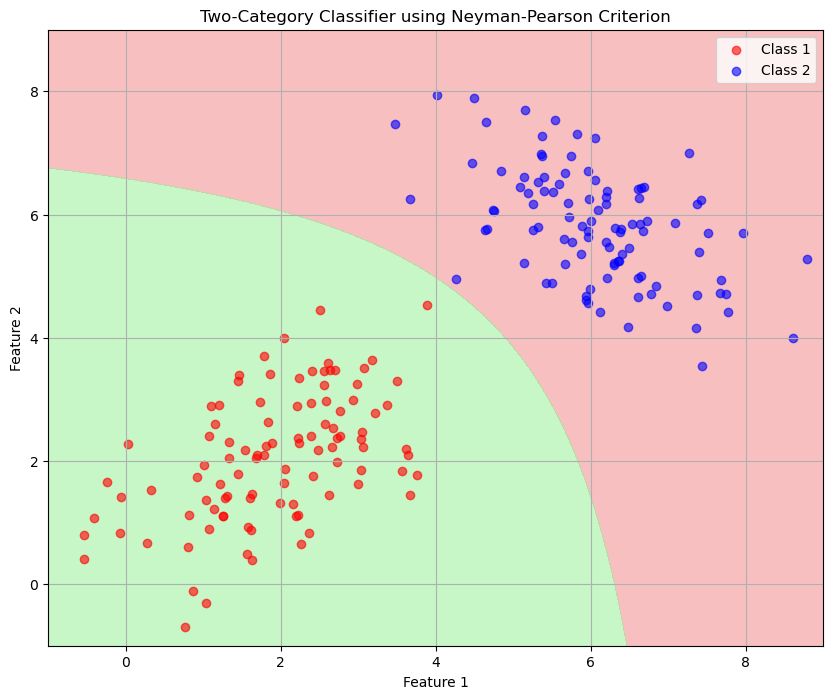

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
N = 100  # Number of samples per class

# Class 1: mean = 2, variance = 1
mean1 = np.array([2, 2])
cov1 = np.array([[1, 0.5], [0.5, 1]])
class1_samples = np.random.multivariate_normal(mean1, cov1, N)

# Class 2: mean = 6, variance = 1
mean2 = np.array([6, 6])
cov2 = np.array([[1, -0.5], [-0.5, 1]])
class2_samples = np.random.multivariate_normal(mean2, cov2, N)

# Combine samples and labels
X = np.vstack((class1_samples, class2_samples))
y = np.array([0] * N + [1] * N)

# Compute means and covariances
mean1_est = np.mean(class1_samples, axis=0)
mean2_est = np.mean(class2_samples, axis=0)

# Function to compute the discriminant function g(x)
def discriminant_function(x):
    p_x_given_class1 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(cov1)))) * \
                       np.exp(-0.5 * (x - mean1_est).T @ np.linalg.inv(cov1) @ (x - mean1_est))
    
    p_x_given_class2 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(cov2)))) * \
                       np.exp(-0.5 * (x - mean2_est).T @ np.linalg.inv(cov2) @ (x - mean2_est))
    
    return p_x_given_class1, p_x_given_class2

# Create a grid for decision boundary visualization
x1_range = np.linspace(-1, 9, 200)
x2_range = np.linspace(-1, 9, 200)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Evaluate the discriminant function on the grid
g_values = np.array([discriminant_function(point) for point in grid_points])
g_class1 = g_values[:, 0]
g_class2 = g_values[:, 1]

# Decision boundary: g(x) = 0
g_diff = g_class1 - g_class2
g_diff = g_diff.reshape(xx1.shape)

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(xx1, xx2, g_diff, levels=[-1, 0, 1], colors=['lightcoral', 'lightgreen'], alpha=0.5)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], color='red', label='Class 1', alpha=0.6)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], color='blue', label='Class 2', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two-Category Classifier using Neyman-Pearson Criterion')
plt.legend()
plt.grid()
plt.show()


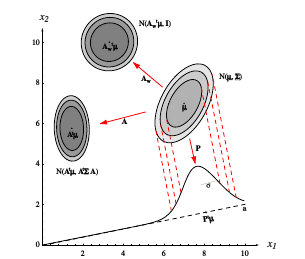

Fig.8: The action of a linear transformation on the feature space will convert an arbitrary normal distribution into another normal distribution. One transformation, A, takes the source distribution into distribution N (At µ, At ΣA). Another linear transformation — a projection P onto line a — leads to N (µ, σ 2 ) measured along a. While the transforms yield distributions in a diﬀerent space, we show them super- imposed on the original x1 − x2 space. A whitening transform leads to a circularly symmetric Gaussian, here shown displaced.

## Multivariate Density

The general multivariate normal density in $ d $ dimensions is given by:

$$
p(x) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right), \tag{37}
$$

where:
- $ x $ is a $ d $-component column vector,
- $ \mu $ is the $ d $-component mean vector,
- $ \Sigma $ is the $ d \times d $ covariance matrix,
- $ |\Sigma| $ and $ \Sigma^{-1} $ are the determinant and inverse of $ \Sigma $, respectively, and
- $ (x - \mu)^T $ is the transpose of $ (x - \mu) $.

For simplicity, we often abbreviate Eq. (37) as $ p(x) \sim N(\mu, \Sigma) $.

Formally, we have:

$$
\mu \equiv E[x] = \int_{-\infty}^{\infty} x p(x) \, dx, \tag{39}
$$

and

$$
\Sigma \equiv E[(x - \mu)(x - \mu)^T] = \int_{-\infty}^{\infty} (x - \mu)(x - \mu)^T p(x) \, dx. \tag{40}
$$

The expected value of a vector or a matrix is computed by taking the expected values of its components. Thus, if $ x_i $ is the $ i $-th component of $ x $, $ \mu_i $ the $ i $-th component of $ \mu $, and $ \sigma_{ij} $ the $ ij $-th component of $ \Sigma $, then:

$$
\mu_i = E[x_i], \tag{41}
$$

and

$$
\sigma_{ij} = E[(x_i - \mu_i)(x_j - \mu_j)]. \tag{42}
$$

The covariance matrix $ \Sigma $ is always symmetric and positive semidefinite. We focus on cases where $ \Sigma $ is positive definite, ensuring a strictly positive determinant.

- The diagonal elements $ \sigma_{ii} $ are the variances of the respective $ x_i $ (i.e., $ \sigma_i^2 $).
- The off-diagonal elements $ \sigma_{ij} $ are the covariances between $ x_i $ and $ x_j $.

If $ x_i $ and $ x_j $ are statistically independent, then $ \sigma_{ij} = 0 $. If all off-diagonal elements are zero, $ p(x) $ reduces to the product of the univariate normal densities for the components of $ x $.

Linear combinations of jointly normally distributed random variables, whether independent or not, are also normally distributed. Specifically, if $ A $ is a $d \times k $ matrix and $ y = A^T x $ is a $ k $-component vector, then:

$$
p(y) \sim N(A^T \mu, A^T \Sigma A). \tag{43}
$$

In the special case where $ k = 1 $ and $ A $ is a unit-length vector $ a $, $ y = a^T x $ represents the projection of $ x $ onto a line in the direction of $ a $; in this case, $ a^T \Sigma a $ is the variance of the projection of $ x $ onto $ a $.

Knowing the covariance matrix allows us to calculate the dispersion of the data in any direction or subspace. A coordinate transformation can convert an arbitrary multivariate normal distribution into a spherical one, which has a covariance matrix proportional to the identity matrix $ I $. If we define $ \Phi $ as the matrix whose columns are the orthonormal eigenvectors of $ \Sigma $, and $ \Lambda $ as the diagonal matrix of the corresponding eigenvalues, then the transformation $ Aw = \Phi \Lambda^{-1/2} $ applied to the coordinates ensures that the transformed distribution has a covariance matrix equal to the identity matrix. In signal processing, the transform $ Aw $ is referred to as a whitening transformation since it makes the spectrum of eigenvectors of the transformed distribution uniform.

The multivariate normal density is fully specified by $ d + \frac{d(d + 1)}{2} $ parameters — the elements of the mean vector $ \mu $ and the independent elements of the covariance matrix $ \Sigma $. 

Samples drawn from a normal population tend to cluster around a central point. The center of the cluster is determined by the mean vector, and the shape is determined by the covariance matrix. 

It follows from Eq. (37) that loci of points of constant density are hyperellipsoids, for which the quadratic form 

$$
(x - \mu)^T \Sigma^{-1} (x - \mu) \text{ is constant.} \tag{44}
$$

The principal axes of these hyperellipsoids are given by the eigenvectors of $ \Sigma $ (described by $ \Phi $); the eigenvalues (described by $ \Lambda $) determine the lengths of these axes. The quantity 

$$
r^2 = (x - \mu)^T \Sigma^{-1} (x - \mu) \tag{45}
$$

is sometimes called the squared Mahalanobis distance from $ x $ to $ \mu $. Thus, contours of constant density are hyperellipsoids of constant Mahalanobis distance to $ \mu $, and the volume of these hyperellipsoids measures the scatter of samples around the mean.

The volume of the hyperellipsoid corresponding to a Mahalanobis distance $ r $ is given by:

$$
V = V_d |\Sigma|^{1/2} r^d, \tag{46}
$$

where $ V_d $ is the volume of a $ d $-dimensional unit hypersphere:

$$
V_d = 
\begin{cases} 
\frac{\pi^{d/2}}{\Gamma(\frac{d}{2} + 1)} & \text{for } d \text{ even} \\ 
2^{d/2} \frac{\pi^{(d-1)/2}}{\Gamma(\frac{d-1}{2} + 1)} & \text{for } d \text{ odd} 
\end{cases} \tag{47}
$$


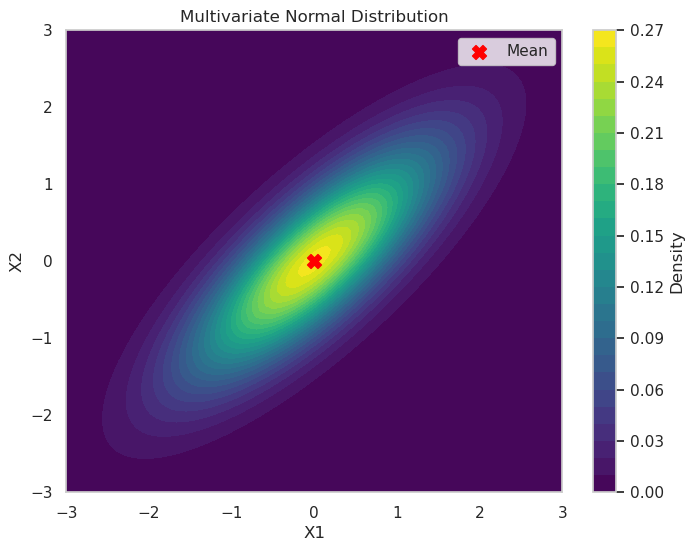

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to compute the multivariate normal density
def multivariate_normal_density(x, mu, cov):
    """
    Computes the multivariate normal density at points x given mean mu and covariance matrix cov.
    
    Args:
    x : ndarray
        The input points (each row is a point).
    mu : ndarray
        The mean vector of the distribution.
    cov : ndarray
        The covariance matrix of the distribution.
        
    Returns:
    ndarray
        The computed density values at each point in x.
    """
    d = len(mu)
    norm_const = 1.0 / np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))
    x_mu = x - mu
    inv_cov = np.linalg.inv(cov)
    result = np.exp(-0.5 * np.einsum('...k,kl,...l->...', x_mu, inv_cov, x_mu))
    return norm_const * result

# Parameters for the distribution
mu = np.array([0, 0])  # Mean
cov = np.array([[1, 0.8], [0.8, 1]])  # Covariance matrix

# Create a grid of points
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
pos = np.dstack((x1, x2))

# Calculate the multivariate normal density
Z = multivariate_normal_density(pos, mu, cov)

# Plotting
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
plt.contourf(x1, x2, Z, levels=30, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(mu[0], mu[1], color='red', s=100, label='Mean', marker='X')
plt.legend()
plt.show()


## Discriminant Functions for the Normal Density

In earlier section, we established that the minimum-error-rate classification can be achieved using the discriminant functions:
$$
g_i(x) = \ln p(x|\omega_i) + \ln P(\omega_i).
\tag{46}
$$

This expression is straightforward to evaluate when the densities $ p(x|\omega_i) $ are multivariate normal, i.e., $ p(x|\omega_i) \sim \mathcal{N}(\mu_i, \Sigma_i) $. From Eq. 37, we have:
$$
g_i(x) = -\frac{1}{2} (x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i) - \frac{d}{2} \ln 2\pi - \frac{1}{2} \ln |\Sigma_i| + \ln P(\omega_i),
\tag{47}
$$
where $ d $ is the dimension of the feature space.

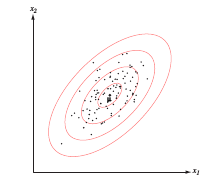

Fig.9: Samples drawn from a two-dimensional Gaussian lie in a cloud centered on the mean µ. The red ellipses show lines of equal probability density of the Gaussian.

###  Case 1: $ \Sigma_i = \sigma^2 I $

The simplest case occurs when the features are statistically independent, and each feature has the same variance $ \sigma^2 $. In this case, the covariance matrix is diagonal:
$$
\Sigma_i = \sigma^2 I.
$$

Geometrically, this corresponds to samples forming equal-size hyperspherical clusters, each centered at the mean vector $ \mu_i $. The determinant and the inverse of $ \Sigma_i $ are straightforward:
$$
|\Sigma_i| = \sigma^{2d}, \quad \Sigma_i^{-1} = \frac{1}{\sigma^2} I.
$$

Since $ |\Sigma_i| $ and the $ \frac{d}{2} \ln 2\pi $ term in Eq. 47 are independent of $ i $, they can be ignored as additive constants. Thus, we obtain:
$$
g_i(x) = -\frac{\|x - \mu_i\|^2}{2\sigma^2} + \ln P(\omega_i),
\tag{48}
$$
where $ \| \cdot \| $ denotes the Euclidean norm:
$$
\|x - \mu_i\|^2 = (x - \mu_i)^T (x - \mu_i).
\tag{49}
$$

If the prior probabilities $ P(\omega_i) $ are unequal, Eq. 48 shows that the squared distance $ \|x - \mu\|^2 $ must be normalized by the variance $ \sigma^2 $ and offset by $ \ln P(\omega_i) $. This means that if $ x $ is equally distant from two different mean vectors, the optimal decision will favor the class with the higher prior probability.

By expanding the quadratic form $ (x - \mu_i)^T (x - \mu_i) $, we get:
$$
g_i(x) = -\frac{1}{2\sigma^2} [x^T x - 2\mu_i^T x + \mu_i^T \mu_i] + \ln P(\omega_i),
\tag{50}
$$
where $ x^T x $ is an additive constant for all $ i $, making it ignorable. Thus, we can rewrite the discriminant functions as:
$$
g_i(x) = w_i^T x + w_{i0},
\tag{51}
$$
where:
$$
w_i = \frac{\mu_i}{\sigma^2},
\tag{52}
$$
and:
$$
w_{i0} = -\frac{\mu_i^T \mu_i}{2\sigma^2} + \ln P(\omega_i).
\tag{53}
$$

### Linear Discriminant Functions

A classifier using linear discriminant functions is called a **linear machine**. This type of classifier has many theoretical properties, which will be discussed in detail in subsequent chapters. For now, we note that the decision surfaces for a linear machine are pieces of hyperplanes defined by:
$$
g_i(x) = g_j(x),
$$
for the two categories with the highest posterior probabilities. This can be expressed as:
$$
w^T (x - x_0) = 0,
\tag{54}
$$
where:
$$
w = \mu_i - \mu_j,
\tag{55}
$$
and:
$$
x_0 = \frac{1}{2}(\mu_i + \mu_j) - \frac{\sigma^2}{\|\mu_i - \mu_j\|^2} \ln \frac{P(\omega_i)}{P(\omega_j)} (\mu_i - \mu_j).
\tag{56}
$$

This equation describes a hyperplane passing through $ x_0 $, orthogonal to $ w $, where $ w = \mu_i - \mu_j $ defines the line between the means. If $ P(\omega_i) = P(\omega_j) $, the second term vanishes, making $ x_0 $ the midpoint between the means, and the hyperplane becomes the perpendicular bisector of the line between the means.


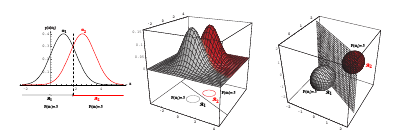

Fig.10: If the covariances of two distributions are equal and proportional to the identity matrix, then the distributions are spherical in d dimensions, and the boundary is a generalized hyperplane of d − 1 dimensions, perpendicular to the line separating the means. In these 1-, 2-, and 3-dimensional examples, we indicate p(x|ωi ) and the boundaries for the case P (ω1 ) = P (ω2 ). In the 3-dimensional case, the grid plane separates R1 from R2 .

In [3]:
import math

def dot_product(vec1, vec2):
    """
    Computes the dot product of two vectors.
    
    Parameters:
    vec1 (list): First vector.
    vec2 (list): Second vector.
    
    Returns:
    float: Dot product of vec1 and vec2.
    """
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

def euclidean_norm_squared(vec1, vec2):
    """
    Computes the squared Euclidean norm of (vec1 - vec2).
    
    Parameters:
    vec1 (list): First vector.
    vec2 (list): Second vector.
    
    Returns:
    float: Squared Euclidean norm of (vec1 - vec2).
    """
    return sum((v1 - v2) ** 2 for v1, v2 in zip(vec1, vec2))

def discriminant_function(x, mu, sigma_squared, prior_prob):
    """
    Computes the discriminant function value for a given input vector x.
    
    Parameters:
    x (list): Feature vector (d-dimensional).
    mu (list): Mean vector for the class (d-dimensional).
    sigma_squared (float): Shared variance for all dimensions.
    prior_prob (float): Prior probability P(ω_i) for the class.
    
    Returns:
    float: Value of the discriminant function g_i(x).
    """
    # Compute the Euclidean norm squared of (x - mu)
    norm_squared = euclidean_norm_squared(x, mu)
    
    # Compute the discriminant function
    g_i = -norm_squared / (2 * sigma_squared) + math.log(prior_prob)
    
    return g_i

# Example data
x = [2.0, 3.0]         # Sample input vector
mu_i = [1.5, 2.5]      # Mean vector for class i
sigma_squared = 1.0    # Shared variance
P_omega_i = 0.6        # Prior probability for class i

# Calculate the discriminant function value for the sample input
g_i_value = discriminant_function(x, mu_i, sigma_squared, P_omega_i)
print("Discriminant function value:", g_i_value)


Discriminant function value: -0.7608256237659907


In [4]:
import math

def dot_product(vec1, vec2):
    """
    Computes the dot product of two vectors.
    
    Parameters:
    vec1 (list): First vector.
    vec2 (list): Second vector.
    
    Returns:
    float: Dot product of vec1 and vec2.
    """
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

def euclidean_norm_squared(vec1, vec2):
    """
    Computes the squared Euclidean norm of (vec1 - vec2).
    
    Parameters:
    vec1 (list): First vector.
    vec2 (list): Second vector.
    
    Returns:
    float: Squared Euclidean norm of (vec1 - vec2).
    """
    return sum((v1 - v2) ** 2 for v1, v2 in zip(vec1, vec2))

def discriminant_function(x, mu, sigma_squared, prior_prob):
    """
    Computes the discriminant function value for a given input vector x.
    
    Parameters:
    x (list): Feature vector (d-dimensional).
    mu (list): Mean vector for the class (d-dimensional).
    sigma_squared (float): Shared variance for all dimensions.
    prior_prob (float): Prior probability P(ω_i) for the class.
    
    Returns:
    float: Value of the discriminant function g_i(x).
    """
    # Compute the Euclidean norm squared of (x - mu)
    norm_squared = euclidean_norm_squared(x, mu)
    
    # Compute the discriminant function
    g_i = -norm_squared / (2 * sigma_squared) + math.log(prior_prob)
    
    return g_i

def classify(x, means, sigma_squared, priors):
    """
    Classifies the input vector x based on discriminant functions for each class.
    
    Parameters:
    x (list): Feature vector to be classified.
    means (list of lists): Mean vectors for each class.
    sigma_squared (float): Shared variance for all classes.
    priors (list): Prior probabilities for each class.
    
    Returns:
    int: Index of the class with the highest discriminant function value.
    """
    discriminant_values = [
        discriminant_function(x, mu, sigma_squared, prior) 
        for mu, prior in zip(means, priors)
    ]
    return discriminant_values.index(max(discriminant_values))

# Example data
x = [2.0, 3.0]          # Sample input vector
means = [[1.5, 2.5],    # Mean vector for class 1
         [3.0, 4.0]]    # Mean vector for class 2
sigma_squared = 1.0     # Shared variance
priors = [0.6, 0.4]     # Prior probabilities for each class

# Classify the sample input
result_class = classify(x, means, sigma_squared, priors)
print("Classified as class:", result_class)


Classified as class: 0


Predicted class for point [10.0, 3.5]: 0


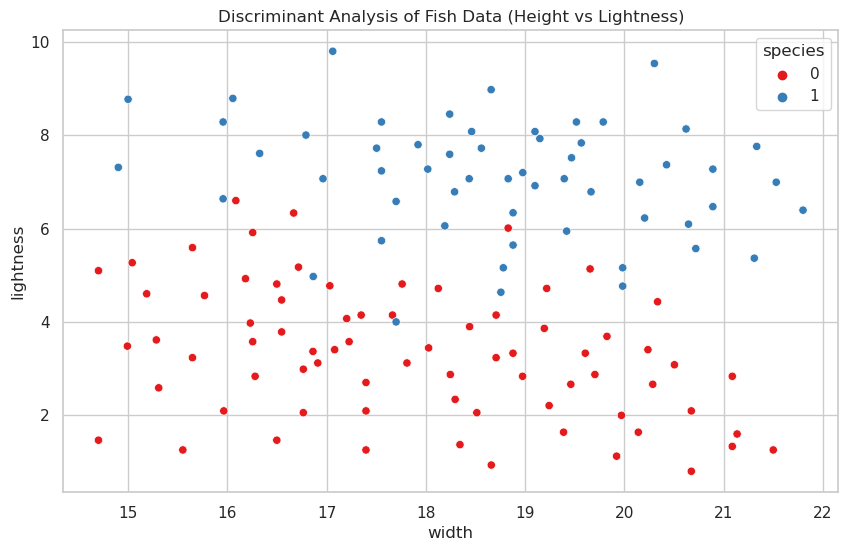

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi, exp, sqrt, log

# Load the Fish dataset
data = pd.read_csv('fish.csv')

# Select relevant features and class labels
features = ['width', 'lightness']
X = data[features]
y = data['species']

# Calculate the mean vector and covariance matrix for each class
class_params = {}
classes = y.unique()

for c in classes:
    X_c = X[y == c]
    mean_vector = X_c.mean().values
    cov_matrix = X_c.cov().values
    class_params[c] = {
        'mean': mean_vector,
        'cov': cov_matrix,
        'prior': len(X_c) / len(X)
    }

# Discriminant function for multivariate normal density
def discriminant(x, mean, cov, prior):
    d = len(mean)
    cov_det = (cov[0][0] * cov[1][1] - cov[0][1] * cov[1][0])
    cov_inv = [[cov[1][1] / cov_det, -cov[0][1] / cov_det],
               [-cov[1][0] / cov_det, cov[0][0] / cov_det]]
    
    diff = [x[i] - mean[i] for i in range(d)]
    quadratic_term = -0.5 * sum(diff[i] * sum(cov_inv[i][j] * diff[j] for j in range(d)) for i in range(d))
    
    const_term = -0.5 * d * log(2 * pi) - 0.5 * log(cov_det)
    return quadratic_term + const_term + log(prior)

# Classify new data points
def classify(x):
    scores = {c: discriminant(x, params['mean'], params['cov'], params['prior'])
              for c, params in class_params.items()}
    return max(scores, key=scores.get)

# Example classification for new data points
new_point = [10.0, 3.5]  # Replace with an actual point for testing
predicted_class = classify(new_point)
print(f"Predicted class for point {new_point}: {predicted_class}")

# Plot the data with Seaborn for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='width', y='lightness', hue='species', data=data, palette='Set1')
plt.title('Discriminant Analysis of Fish Data (Height vs Lightness)')
plt.xlabel('width')
plt.ylabel('lightness')
plt.show()


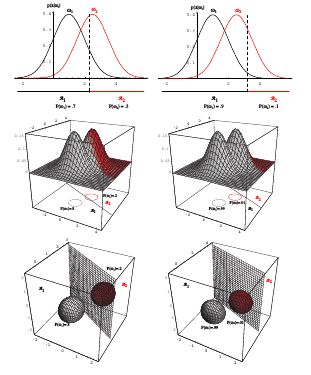

Fig.11: As the priors are changed, the decision boundary shifts; for suﬃciently disparate priors the boundary will not lie between the means of these 1-, 2- and 3-dimensional spherical Gaussian distributions.


# Discriminant Functions for the Normal Density

In earlier sections, we established that the minimum-error-rate classification can be achieved using the discriminant functions:

$$
g_i(x) = \ln p(x|\omega_i) + \ln P(\omega_i).
$$

This expression is straightforward to evaluate when the densities $ p(x|\omega_i) $ are multivariate normal, i.e., $ p(x|\omega_i) \sim \mathcal{N}(\mu_i, \Sigma_i) $. From Eq. (37), we have:

$$
g_i(x) = -\frac{1}{2} (x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i) - \frac{d}{2} \ln 2\pi - \frac{1}{2} \ln |\Sigma_i| + \ln P(\omega_i).
$$

### Case 1: $ \Sigma_i = \sigma^2 I $

The simplest case occurs when the features are statistically independent, and each feature has the same variance $ \sigma^2 $. In this case, the covariance matrix is diagonal:

$$
\Sigma_i = \sigma^2 I.
$$

Geometrically, this corresponds to samples forming equal-size hyperspherical clusters, each centered at the mean vector $ \mu_i $. 

### Discriminant Function Simplification

Since $ |\Sigma_i| $ and the $ \frac{d}{2} \ln 2\pi $ term in Eq. (47) are independent of $ i $, they can be ignored as additive constants. Thus, we obtain:

$$
g_i(x) = -\frac{\|x - \mu_i\|^2}{2\sigma^2} + \ln P(\omega_i).
$$

### Minimum Distance Classifier

If the prior probabilities $ P(\omega_i) $ are the same for all classes, the $ \ln P(\omega_i) $ term becomes another unimportant additive constant that can be ignored. In this case, the optimum decision rule can be stated very simply: 

To classify a feature vector $ x $, measure the Euclidean distance $ \|x - \mu_i\| $ from each $ x $ to each of the $ c $ mean vectors, and assign $ x $ to the category of the nearest mean. Such a classifier is called a **minimum distance classifier**.

### Case 2: $ \Sigma_i = \Sigma $

Another simple case arises when the covariance matrices for all of the classes are identical but otherwise arbitrary. Geometrically, this corresponds to the situation in which the samples fall in hyperellipsoidal clusters of equal size and shape, with the cluster for the $ i $-th class being centered about the mean vector $ \mu_i $.

The discriminant functions simplify to:

$$
g_i(x) = - (x - \mu_i)^T \Sigma^{-1} (x - \mu_i) + \ln P(\omega_i).
$$

### Classifier with Equal Priors

If the prior probabilities $ P(\omega_i) $ are the same for all classes, the $ \ln P(\omega_i) $ term can be ignored. The optimal decision rule can again be stated very simply: 

To classify a feature vector $ x $, measure the squared Mahalanobis distance $ (x - \mu_i)^T \Sigma^{-1} (x - \mu_i) $ from $ x $ to each of the $ c $ mean vectors, and assign $ x $ to the category of the nearest mean.

### Linear Discriminant Functions

The discriminant functions can be expressed as:

$$
g_i(x) = w_i^T x + w_{i0},
$$

where

$$
w_i = \Sigma^{-1} \mu_i,
$$

and

$$
w_{i0} = - \mu_i^T \Sigma^{-1} \mu_i + \ln P(\omega_i).
$$

### Decision Boundaries

The resulting decision boundaries are again hyperplanes defined by:

$$
w^T (x - x_0) = 0,
$$

where 

$$
w = \Sigma^{-1} (\mu_i - \mu_j),
$$

and

$$
x_0 = \frac{1}{2}(\mu_i + \mu_j) - \frac{\Sigma}{\|\mu_i - \mu_j\|^2} \ln \frac{P(\omega_i)}{P(\omega_j)} (\mu_i - \mu_j).
$$

The hyperplane separating regions $ R_i $ and $ R_j $ intersects the line between the means at the point $ x_0 $. If the prior probabilities are equal, $ x_0 $ is the midpoint between the means. If the prior probabilities are not equal, the optimal boundary hyperplane is shifted away from the more likely mean.

### Summary

Changing the prior probabilities alters the decision boundary, and for sufficiently disparate priors, the boundary may not lie between the means of the Gaussian distributions. If the variance $ \sigma^2 $ is small relative to the squared distance $ \|\mu_i - \mu_j\| $, the position of the decision boundary is relatively insensitive to the exact values of the prior probabilities.

---

This notebook provides an overview of Gaussian discriminant analysis, focusing on the impacts of covariance matrices and prior probabilities on decision boundaries.



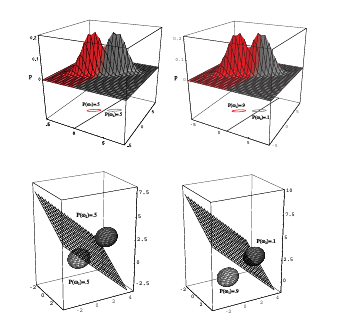

Fig.12: Probability densities (indicated by the surfaces in two dimensions and ellipsoidal surfaces in three dimensions) and decision regions for equal but asymmetric Gaussian distributions. The decision hyperplanes need not be perpendicular to the line connecting the means.

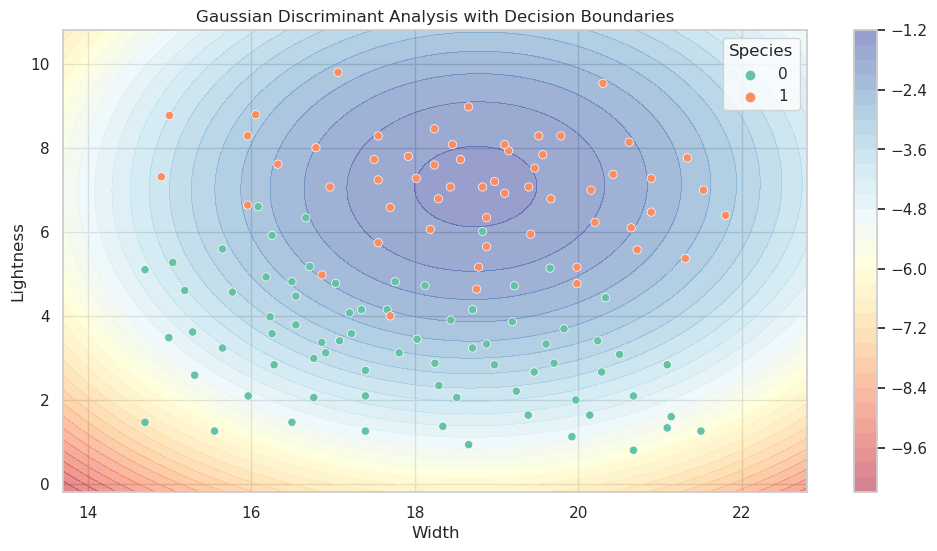

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

# Load the dataset
fish_data = pd.read_csv('fish.csv')

# Select relevant features and target variable
features = fish_data[['width', 'lightness']]
target = fish_data['species']

# Calculate means and covariance
means = fish_data.groupby('species')[['width', 'lightness']].mean()
covariance = features.cov().values

# Create a mesh grid for plotting decision boundaries
x_min, x_max = features['width'].min() - 1, features['width'].max() + 1
y_min, y_max = features['lightness'].min() - 1, features['lightness'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Function to calculate the discriminant function
def discriminant_function(x, mean, cov):
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    
    if det_cov == 0:
        raise ValueError("Covariance matrix is singular")
    
    diff = np.array(x) - np.array(mean)
    quad_form = diff.T @ inv_cov @ diff
    return -0.5 * quad_form - 0.5 * np.log(det_cov)

# Create an array to store the predicted classes
Z = np.zeros(xx.shape)

# Classify each point in the mesh grid
for i, species in enumerate(means.index):
    for j in range(xx.shape[0]):
        for k in range(xx.shape[1]):
            point = [xx[j, k], yy[j, k]]
            Z[j, k] = discriminant_function(point, means.loc[species], covariance)

# Plotting the decision boundary
plt.figure(figsize=(12, 6))
contour = plt.contourf(xx, yy, Z, levels=30, cmap='RdYlBu', alpha=0.5)

# Scatter plot of the original data
sns.scatterplot(data=fish_data, x='width', y='lightness', hue='species', palette='Set2', edgecolor='w')

plt.title('Gaussian Discriminant Analysis with Decision Boundaries')
plt.xlabel('Width')
plt.ylabel('Lightness')
plt.colorbar(contour)
plt.legend(title='Species')
plt.show()


## Discriminant Analysis: Case 3 - Arbitrary Covariance Matrices

In this section, we will explore the scenario where the covariance matrices $ \Sigma_i $ are arbitrary for each category. 

## Discriminant Functions

In the general multivariate normal case, the discriminant functions can be expressed as:

$$
g_i(x) = x^T W_i x + w_i^T x + w_{i0}
$$

where:

1. The matrix $ W_i $ is given by:

$$
W_i = -\Sigma^{-1}
$$

2. The vector $ w_i $ is defined as:

$$
w_i = \Sigma^{-1} \mu_i
$$

3. The constant term $ w_{i0} $ is calculated as:

$$
w_{i0} = -\frac{1}{2} \mu_i^T \Sigma^{-1} \mu_i - \frac{1}{2} \ln |\Sigma_i| + \ln P(\omega_i)
$$

### Decision Surfaces

The decision surfaces for this case are inherently quadratic. They can take various forms, including:

- Hyperplanes
- Pairs of hyperplanes
- Hyperspheres
- Hyperellipsoids
- Hyperparaboloids
- Quadrics
- Hyperhyperboloids

This complexity indicates that even in one dimension, for arbitrary covariance, the decision regions need not be simply connected. 

### Examples

Fig.14 and 15 illustrate how these different forms can arise, with the contours of constant probability density representing the variances.

- **Fig.13**: Non-simply connected decision regions can arise in one dimension for Gaussians having unequal variance.

The extension of these results to more than two categories is straightforward, although care must be taken to identify which two of the total $ c $ categories are responsible for any boundary segment.

### Visualization

To visualize the decision surfaces for a four-category case made up of Gaussian distributions, see **Figure 2.16**. If the distributions are more complicated, the decision regions can be even more complex, while still adhering to the underlying theory.


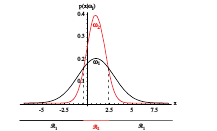

Fig.13: Non-simply connected decision regions can arise in one dimensions for Gaussians having unequal variance.

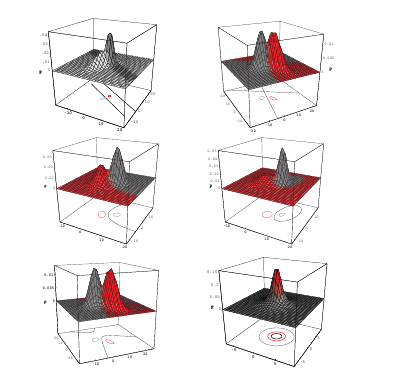


Fig.14: Arbitrary Gaussian distributions lead to Bayes decision boundaries that are general hyperquadrics. Conversely, given any hyperquadratic, one can ﬁnd two Gaussian distributions whose Bayes decision boundary is that hyperquadric.

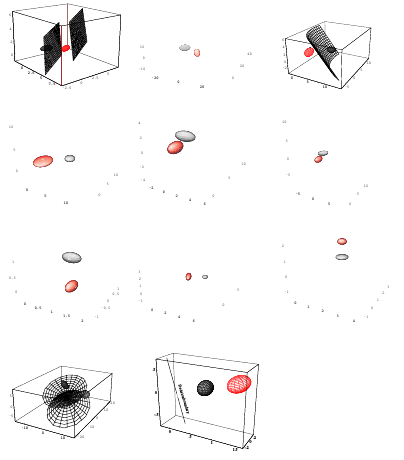

Fig.15: Arbitrary three-dimensional Gaussian distributions yield Bayes decision boundaries that are two-dimensional hyperquadrics. There are even degenerate cases in which the decision boundary is a line.

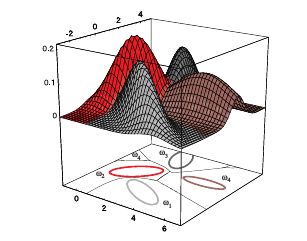

Fig.16: The decision regions for four normal distributions. Even with such a low number of categories, the shapes of the boundary regions can be rather complex.

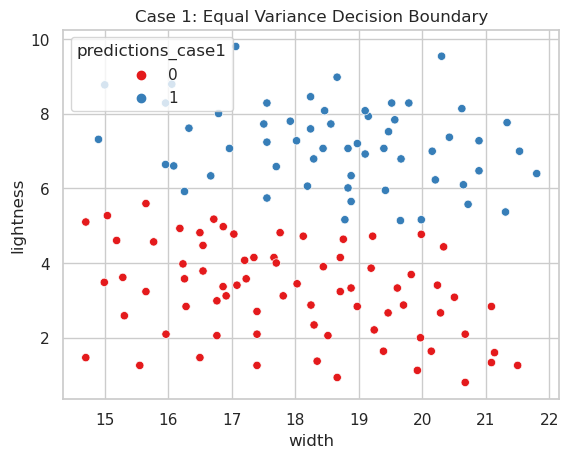

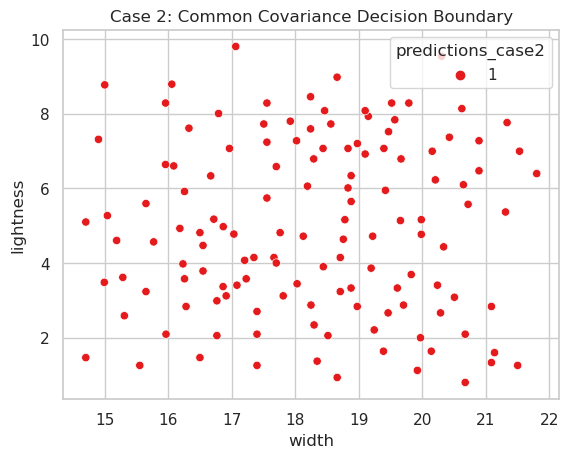

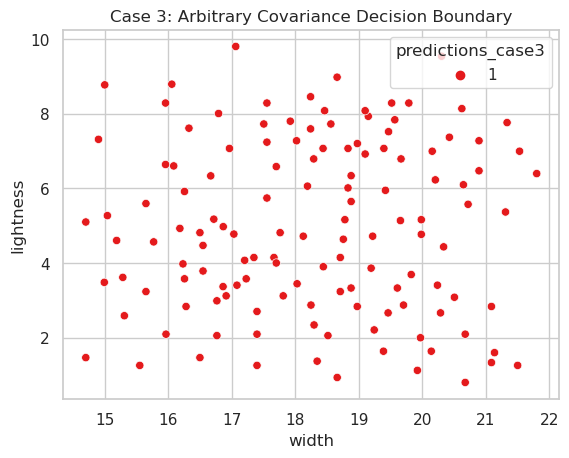

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the fish dataset
fish = pd.read_csv('fish.csv')

# Case 1: Equal Variance (σ²I)
def discriminant_function_case1(x, mu, sigma_sq):
    """Discriminant function for Case 1: Equal variance"""
    return -np.linalg.norm(x - mu) ** 2 / (2 * sigma_sq)

def predict_case1(X, mus, sigma_sq):
    """Predict class labels for Case 1"""
    predictions = []
    for x in X:
        scores = [discriminant_function_case1(x, mu, sigma_sq) for mu in mus]
        predictions.append(np.argmax(scores))
    return predictions

# Calculate means
means_case1 = fish.groupby('species')[['width', 'lightness']].mean().values

# Assume a fixed variance
sigma_sq = 1.0  # Change this value as necessary
X_case1 = fish[['width', 'lightness']].values
predictions_case1 = predict_case1(X_case1, means_case1, sigma_sq)

# Add predictions to the DataFrame for visualization
fish['predictions_case1'] = predictions_case1
sns.scatterplot(data=fish, x='width', y='lightness', hue='predictions_case1', palette='Set1')
plt.title('Case 1: Equal Variance Decision Boundary')
plt.show()

# Case 2: Common Covariance (Σ)
def discriminant_function_case2(x, mu, cov_inv):
    """Discriminant function for Case 2: Common covariance"""
    return -0.5 * (x.T @ cov_inv @ x) + (cov_inv @ mu).T @ x

def predict_case2(X, mus, cov_inv):
    """Predict class labels for Case 2"""
    predictions = []
    for x in X:
        scores = [discriminant_function_case2(x, mu, cov_inv) for mu in mus]
        predictions.append(np.argmax(scores))
    return predictions

# Calculate means and covariance matrix
cov_matrix = fish[['width', 'lightness']].cov().values
cov_inv = np.linalg.inv(cov_matrix)
means_case2 = fish.groupby('species')[['width', 'lightness']].mean().values
X_case2 = fish[['width', 'lightness']].values
predictions_case2 = predict_case2(X_case2, means_case2, cov_inv)

# Add predictions to the DataFrame for visualization
fish['predictions_case2'] = predictions_case2
sns.scatterplot(data=fish, x='width', y='lightness', hue='predictions_case2', palette='Set1')
plt.title('Case 2: Common Covariance Decision Boundary')
plt.show()

# Case 3: Arbitrary Covariance (Σi)
def discriminant_function_case3(x, mu, cov_inv, cov_det):
    """Discriminant function for Case 3: Arbitrary covariance"""
    return -0.5 * (x.T @ cov_inv @ x) + (cov_inv @ mu).T @ x - 0.5 * np.log(cov_det)

def predict_case3(X, mus, covs):
    """Predict class labels for Case 3"""
    predictions = []
    for x in X:
        scores = []
        for i, mu in enumerate(mus):
            cov_inv = np.linalg.inv(covs[i])
            cov_det = np.linalg.det(covs[i])
            score = discriminant_function_case3(x, mu, cov_inv, cov_det)
            scores.append(score)
        predictions.append(np.argmax(scores))
    return predictions

# Calculate means and individual covariance matrices for each species
species_groups = fish.groupby('species')
means_case3 = species_groups[['width', 'lightness']].mean().values
covs_case3 = [group[['width', 'lightness']].cov().values for name, group in species_groups]
X_case3 = fish[['width', 'lightness']].values
predictions_case3 = predict_case3(X_case3, means_case3, covs_case3)

# Add predictions to the DataFrame for visualization
fish['predictions_case3'] = predictions_case3
sns.scatterplot(data=fish, x='width', y='lightness', hue='predictions_case3', palette='Set1')
plt.title('Case 3: Arbitrary Covariance Decision Boundary')
plt.show()


![image.png](attachment:image.png)

The computed Bayes decision boundary for two Gaussian distributions, each based on four data points.

## Decision Regions for Two-Dimensional Gaussian Data

To clarify these ideas, we explicitly calculate the decision boundary for two-category two-dimensional data. Let $ \omega_1 $ be the set of the four black points, and $ \omega_2 $ the red points.

Although we will spend much of the next chapter understanding how to estimate the parameters of our distributions, for now we simply assume that we need merely calculate the means and covariances by the discrete versions of Eqs. 39 & 40; they are found to be:

$$
\mu_1 = \begin{pmatrix} 3 \\ 1.5 \end{pmatrix}, \quad \Sigma_1 = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}, \quad \mu_2 = \begin{pmatrix} 6 \\ 0 \end{pmatrix}, \quad \Sigma_2 = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}
$$

The inverse matrices are then:

$$
\Sigma_1^{-1} = \begin{pmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{2} \end{pmatrix}, \quad \Sigma_2^{-1} = \begin{pmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{2} \end{pmatrix}
$$

We assume equal prior probabilities, $ P(\omega_1) = P(\omega_2) = 0.5 $, and substitute these into the general form for a discriminant, setting $ g_1(x) = g_2(x) $ to obtain the decision boundary:

$$
x_2 = 3.514 - 1.125x_1 + 0.1875x_1^2
$$

This equation describes a parabola with a vertex at $ (1.83, \text{y-coordinate}) $. 

Note that despite the fact that the variance in the data along the $ x_2 $ direction for both distributions is the same, the decision boundary does not pass through the point $ \left(\frac{3+6}{2}, \frac{1.5+0}{2}\right) = \left(4.5, 0.75\right) $, which is midway between the means. This is because for the $ \omega_1 $ distribution, the probability distribution is “squeezed” in the $ x_1 $-direction more so than for the $ \omega_2 $ distribution. 

Because the overall prior probabilities are the same (i.e., the integral over space of the probability density), the distribution is increased along the $ x_2 $ direction (relative to that for the $ \omega_2 $ distribution). Thus, the decision boundary lies slightly lower than the point midway between the two means, as can be seen in the decision boundary.

### Graphical Representation
Below is a graphical representation of the computed Bayes decision boundary for two Gaussian distributions, each based on four data points.

```python


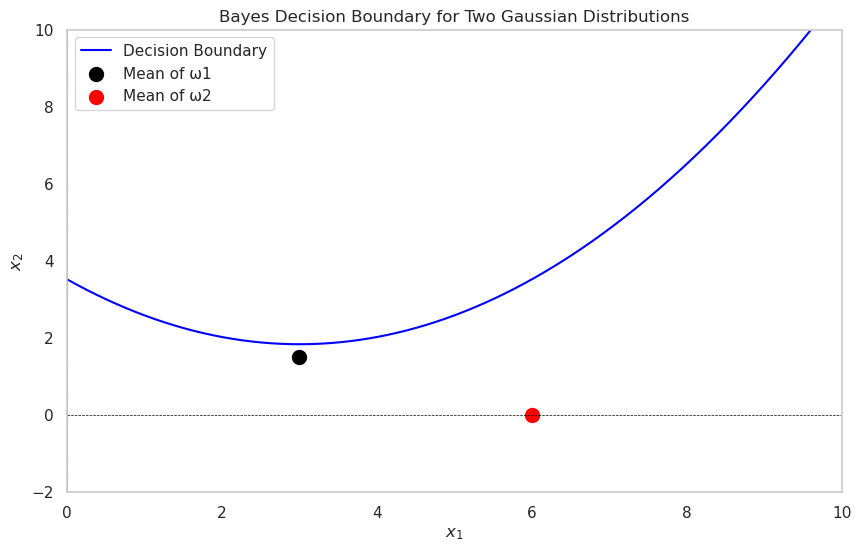

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Gaussian distributions
mu1 = np.array([3, 1.5])
sigma1 = np.array([[2, 0], [0, 2]])
mu2 = np.array([6, 0])
sigma2 = np.array([[2, 0], [0, 2]])

# Generate data points for the decision boundary
x1 = np.linspace(0, 10, 400)
x2 = 3.514 - 1.125 * x1 + 0.1875 * x1**2

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, label='Decision Boundary', color='blue')
plt.scatter(mu1[0], mu1[1], color='black', s=100, label='Mean of ω1')
plt.scatter(mu2[0], mu2[1], color='red', s=100, label='Mean of ω2')
plt.xlim(0, 10)
plt.ylim(-2, 10)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Bayes Decision Boundary for Two Gaussian Distributions')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()
